# Homework 1

 - Name: Bundhoo Simriti
 - Student Id: 1006281

In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Question 2

In [26]:
# Setting OS paths
train_path = os.path.join('HW1_data', '2', 'train_1_5.csv')
test_path = os.path.join('HW1_data', '2', 'test_1_5.csv')

# Reading data
train_data = np.genfromtxt(train_path, delimiter=',')
test_data = np.genfromtxt(test_path, delimiter=',')
#print(train_data)
#print(test_data)

In [27]:
# Initialising the parameters
def initialise_parameters():
    offset = 0
    theta = np.array([0.0,0.0])
    return offset, theta

In [28]:
# Training the perceptron algorithm
def train_perceptron(offset, theta, train_data, epochs):
    training_features = train_data[:, : -1]
    training_targets = train_data[:, -1]
    
    for number in range(epochs):
        for x, y in zip(training_features, training_targets):
            if (y * ((np.dot(theta, x)) + offset)) <= 0.0:
                offset += y
                theta += y*x
                #print("Updated offset:", offset,"and Updated theta:", theta)
                
    return offset, theta

In [29]:
# Testing the perceptron algorithm
def test_perceptron(offset, theta, test_data):
    test_features = test_data[:, : -1]
    test_targets = test_data[:, -1]
    
    #accuracy = true positives + true_negatives / total
    accuracy_count = 0
    total = len(test_data)
    
    for x,y in zip(test_features, test_targets):
        if (y * ((np.dot(theta, x)) + offset)) > 0.0:
            accuracy_count += 1
            
    accuracy = (accuracy_count/total) * 100
    return offset, theta, accuracy

In [30]:
# Running the algorithm and displaying results
def display_results(epoch):
    print("RESULTS FOR", epoch, "EPOCH/S")
    
    initial_offset, initial_theta = initialise_parameters()
    offset, theta = train_perceptron(initial_offset, initial_theta, train_data, epoch)
    #print("After training data:")
    #print("Offset:", offset, "Theta:", theta)

    offset, theta, accuracy = test_perceptron(offset, theta, test_data)
    print("After testing data:")
    print("Offset:", offset, "Theta:", theta, "Accuracy:", accuracy, "%")

### a)

Epoch = 1
<br>
Report the θ, offset and accuracy on the test set

In [31]:
#Run the perceptron algorithm with offset on the training data for 1 epoch
display_results(1) #epoch = 1

RESULTS FOR 1 EPOCH/S
After testing data:
Offset: 0.0 Theta: [-2.4483233  -5.88190688] Accuracy: 96.7065868263473 %


### b)

Epochs = 5
<br>
Report the θ, offset and accuracy on the test set

In [32]:
#Run the perceptron algorithm with offset on the training data for 5 epochs
display_results(5) #epoch = 5

RESULTS FOR 5 EPOCH/S
After testing data:
Offset: 1.0 Theta: [-2.05895878 -8.83521606] Accuracy: 96.7065868263473 %


### c) Help for TA:

1. Please ensure that the file is in the same directory as HW1 folder to enable loading of the csv files.
<br>
2. Run the first cells to import the extensions.
<br>
3. The first 5 cells under the heading 'Question 2' contains all the code for running the perceptron algorithm. Please run them sequentially (if there is no output or error, the code has run successfully).
<br>
4. The cell under the subheading '(a)' will display the theta, offset and accuracy after running it (provided the code above it has already ran).
<br>
5. Follow the same steps for the cell under subheading part '(b)'.

## Question 3

In [33]:
#Setting OS paths
train_path = os.path.join('HW1_data', '3', 'train_warfarin.csv')
test_path = os.path.join('HW1_data', '3', 'validation_warfarin.csv')
validate_path = os.path.join('HW1_data', '3', 'test_warfarin.csv')

#Reading data
train_data = np.genfromtxt(train_path, delimiter=',')
test_data = np.genfromtxt(test_path, delimiter=',')
validate_data = np.genfromtxt(validate_path, delimiter=',')

#print(train_data)
#print(test_data)
#print(validate_data)

In [34]:
#Extracting data
training_features = train_data[:, : -1]
training_targets = train_data[:, -1]

#print(training_features)
#print(training_targets)

validating_features = validate_data[:, : -1]
validating_targets = validate_data[:, -1]

#print(validating_features)
#print(validating_targets)

testing_features = test_data[:, : -1]
testing_targets = test_data[:, -1]

#print(testing_features)
#print(testing_targets)

In [35]:
# Normalize the features
def normalize_features(features):
    means = np.mean(features, axis=0)
    stds = np.std(features, axis=0)
    normalized_features = (features - means) / stds
    return normalized_features

In [36]:
#Initialise the parameters
def initialise_parameters():
    learning_rate = 0.1
    iterations = 10000
    weights = np.zeros(training_features.shape[1]) #theta
    bias = 0.0   
    
    return learning_rate, iterations, weights, bias

In [37]:
#Stochastic gradient descent
def stochastic_gradient_descent(features, targets, learning_rate, iterations, weights, bias):
    num_examples = features.shape[0]
    mse_values = []

    for iteration in range(iterations):
        random_index = np.random.randint(num_examples)
        xi = features[random_index]
        yi = targets[random_index]

        predicted = np.dot(xi, weights) + bias

        error = yi - predicted

        weights = weights + learning_rate * error * xi
        bias = bias + learning_rate * error * np.ones_like(bias)
        
        #weight = weight + learningrate * (yi - (np.dot(xi, weights) + bias )) * xi (correct)
        #bias = bias + learningrate * (yi - (np.dot(xi, weights) + bias )) (not too sure)

        mse = np.mean(((-np.dot(features, weights) - bias + targets) ** 2))
        mse_values.append(mse)

        if iteration % 100 == 0:
            print(f"Iteration: {iteration}, MSE: {mse}")

    return weights, bias, mse_values

In [38]:
#Training the linear regression model
def train_linear_regression():
    learning_rate, iterations, weights, bias = initialise_parameters()
    normalized_training_features = normalize_features(training_features)
    weights, bias, mse_values_train = stochastic_gradient_descent(normalized_training_features, training_targets,learning_rate, iterations, weights, bias)
    return weights, bias, mse_values_train

In [39]:
#Validating the linear regression model
def validate_linear_regression(weights, bias):
    normalized_validating_features = normalize_features(validating_features)
    mse_values = np.mean((np.dot(normalized_validating_features, weights) + bias - validating_targets) ** 2)
    return np.full(len(mse_values_train), mse_values)

In [40]:
#Testing the linear regression model
def test_linear_regression(weights, bias):
    normalized_testing_features = normalize_features(testing_features)
    mse_values = np.mean((np.dot(normalized_testing_features, weights) + bias - testing_targets) ** 2)
    return np.full(len(mse_values_train), mse_values)

In [41]:
#Plotting the graphs
def plot_graph(iterations, mse_values_train, mse_values_validation, mse_values_test):
    plt.plot(iterations, mse_values_train, label='Training Set')
    plt.plot(iterations, mse_values_validation, label='Validation Set')
    plt.plot(iterations, mse_values_test, label='Test Set')

    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE during Stochastic Gradient Descent')
    plt.legend()
    plt.show()

In [42]:
#Displaying graph
def display_graph(mse_values_train, mse_values_validation, mse_values_test):
    iterations = range(0, len(mse_values_train) * 100, 100)
    plot_graph(iterations, mse_values_train, mse_values_validation, mse_values_test)

In [43]:
# Train the linear regression model
weights, bias, mse_values_train = train_linear_regression()
mse_values_validation = validate_linear_regression(weights, bias)
mse_values_test = test_linear_regression(weights, bias)

Iteration: 0, MSE: 0.48
Iteration: 100, MSE: 31.98968034443915
Iteration: 200, MSE: 269.3203007548667
Iteration: 300, MSE: 433.1789583048187
Iteration: 400, MSE: 2887.876719266606
Iteration: 500, MSE: 17703.924877070636
Iteration: 600, MSE: 25686.43745928923
Iteration: 700, MSE: 69230.91668752751
Iteration: 800, MSE: 702585.5823920397
Iteration: 900, MSE: 1216570.40503962
Iteration: 1000, MSE: 3781556.814295145
Iteration: 1100, MSE: 8627609.07886992
Iteration: 1200, MSE: 13075101.710311906
Iteration: 1300, MSE: 210482580.4691486
Iteration: 1400, MSE: 2083726060.7134156
Iteration: 1500, MSE: 11869528754.02349
Iteration: 1600, MSE: 51390993450.79471
Iteration: 1700, MSE: 511434086480.1557
Iteration: 1800, MSE: 6030402308909.848
Iteration: 1900, MSE: 203087802312661.88
Iteration: 2000, MSE: 1507954381056208.2
Iteration: 2100, MSE: 7702413762336133.0
Iteration: 2200, MSE: 4.5222604621266936e+16
Iteration: 2300, MSE: 2.938187441295418e+17
Iteration: 2400, MSE: 5.189002288887509e+18
Iteratio

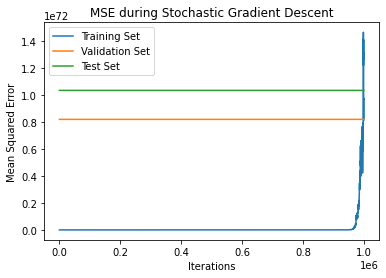

In [44]:
# Display the graph
display_graph(mse_values_train, mse_values_validation, mse_values_test)

### Help for TA:

1. Please ensure that the file is in the same directory as HW1 folder to enable loading of the csv files.
<br>
2. Run the first cells from Question 2 to import the extensions.
<br>
3. Please run them sequentially (if there is no output or error, the code has run successfully).
<br>
4. The cell under the comment "Display the graph" will display the graphs after running it (provided the code above it has already ran).

### b)

1. Multiple models consisting of different values of θ and θ$_0$are trained using the training set.
<br>
2. The performance of each model is evaluated using a metric such the ean squared error (MSE) on the validation set.
<br>
3. The performances of the models on the validation set are compared. 
<br>
4. The model that achieves the lowest validation error is selected to generalise well to unseen data.
<br>
5. Once the best model is selected, use it with its corresponding parameters (θ, θ$_0$) to make predictions on the test set.

## Question 4

In [45]:
# Setting OS paths
x_inputs = os.path.join('HW1_data', '4', 'hw1_ridge_x.dat')
y_outputs = os.path.join('HW1_data', '4', 'hw1_ridge_y.dat')

# Reading data
X_input = np.genfromtxt(x_inputs, delimiter=',')
Y_input = np.genfromtxt(y_outputs, delimiter=',')

In [46]:
# Splitting into train set and validation set 

# Features
vX = X_input[40:, :]
tX = X_input[:40,:]

# Responses
vY = Y_input[40:]
tY = Y_input[:40]

print(vX.shape)
print(tX.shape)
print(vY.shape)
print(tY.shape)

(10, 4)
(40, 4)
(10,)
(40,)


### a)

In [47]:
# Ridge Algorithm
def ridge_regression(tX, tY, l):
    
    n = tX.shape[0]
    d = tX.shape[1]
    identity = np.identity(d)  # Identity matrix of size d

    # Compute the optimal weights using the ridge regression formula
    theta = np.linalg.inv(n * l * identity + tX.T @ tX) @ tX.T @ tY
    return theta

# Select λ = 0.15
lambda_value = 0.15

# Call the ridge_regression function
theta = ridge_regression(tX[:40, :], tY[:40], lambda_value)
print("The resulting value of θ for λ = 0.15:", theta)

The resulting value of θ for λ = 0.15: [-5.55705218e-01  1.15682144e+00 -1.59042086e-03 -1.60716070e+00]


### b)

Use sample code provided

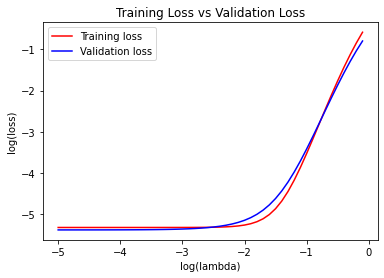

λ that minimises validation loss: 1e-05


In [48]:
import numpy as np
import matplotlib.pyplot as plt

tn = tX.shape[0]
vn = vX.shape[0]

tloss = []
vloss = []

# The index range to cover λ = 10^-5 to λ = 10^0
index = np.arange(-5, 0, 0.1)  

for i in index:
    # Call the ridge_regression function with the correct name
    w = ridge_regression(tX, tY, 10 ** i) 
    tloss.append(np.sum((np.dot(tX, w) - tY) ** 2) / tn / 2)
    vloss.append(np.sum((np.dot(vX, w)- vY) ** 2) / vn / 2)

plt.plot(index, np.log(tloss), 'r', label="Training loss")
plt.plot(index, np.log(vloss), 'b', label="Validation loss")
plt.xlabel('log(lambda)')
plt.ylabel('log(loss)')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

best_logλ = index[vloss.index(min(vloss))]
print(f'λ that minimises validation loss: {10**best_logλ}')